# 轮廓
- 简单来说，轮廓即包围边界的连续点所形成的曲线，有相同的颜色和粗细。
- 轮廓适合形状分析、目标检测和识别。


## 要点
1. 为了准确，尽量使用二值化图像进行轮廓检测
2. findContours函数从3.2版本开始不再修改原图像，而是返回新图像。
3. 应该被检测的物体颜色是白色的，背景是黑色的


## 步骤
1. 二值化图像  (threshold函数)
2. 找出轮廓   (findContours函数)
3. 画出轮廓   (drawContours函数)

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

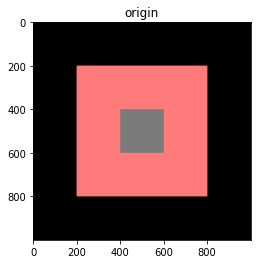

In [7]:
# 简单构造一个轮廓鲜明的图像
img = np.zeros((1000, 1000, 3), dtype=np.uint8)

img[200:800, 200:800, 0] = 255
img[200:800, 200:800, 1] = 123
img[200:800, 200:800, 2] = 123

img[400:600, 400:600, 0] = 123
img[400:600, 400:600, 1] = 123
img[400:600, 400:600, 2] = 123

plt.title('origin')
plt.imshow(img)
plt.show()

# cv.imwrite('test.png', img)

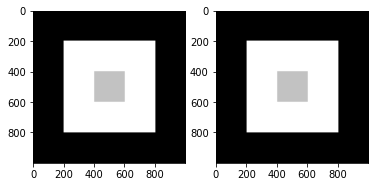

In [8]:
test_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# test_img = img
ret, output = cv.threshold(test_img, 75, 255, cv.THRESH_TOZERO)

plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.show()

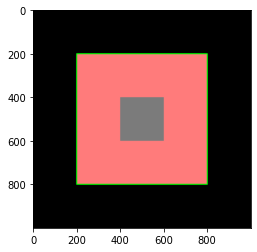

In [16]:
# 3.x版本返回三个参数，4.x版本返回2个参数
contours, hierarchy = cv.findContours(output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

test_img = img

# 这里注意和OpenCV文档不一样的地方
# 因为文档里面说的是contours[3]，而我这里面因为图片有所差别，检测出来的contour的数量并没有4个，只有一个
# 最通用的做法就是使用contours[len(contours)-1]
cnt = contours[len(contours) - 1]  # cnt得到某个轮廓
out = cv.drawContours(test_img, [cnt], 0, (0, 255, 0), 3)  # 第三个参数若非-1表示所有轮廓

plt.imshow(out)
plt.show()

## 轮廓特征
- 矩 (moment)
    - 计算重心
- 轮廓面积 (contour area)
- 轮廓周长 (contour perimeter)
- 轮廓近似估测
- 凸包
- 边界矩阵
- 最小封闭圆
- 拟合椭圆
- 拟合直线


In [19]:
# moment

m = cv.moments(cnt)
print(m)

{'m00': 358801.0, 'm10': 179221099.5, 'm01': 179221099.5, 'm20': 100249119000.33333, 'm11': 89520939200.25, 'm02': 100249119000.33333, 'm30': 60791886560949.75, 'm21': 50074434940666.5, 'm12': 50074434940666.5, 'm03': 60791886560949.75, 'mu20': 10728179800.083328, 'mu11': 0.0, 'mu02': 10728179800.083328, 'mu30': 0.0078125, 'mu21': 0.0029296875, 'mu12': 0.0029296875, 'mu03': 0.0078125, 'nu20': 0.0833333333333333, 'nu11': 0.0, 'nu02': 0.0833333333333333, 'nu30': 1.0131084050471658e-16, 'nu21': 3.799156518926872e-17, 'nu12': 3.799156518926872e-17, 'nu03': 1.0131084050471658e-16}


In [21]:
# 重心
cx = m['m01'] / m['m00']
cy = m['m10'] / m['m00']
print(f'x轴重心是 {cx}, y轴重心是{cy}')

x轴重心是 499.5, y轴重心是499.5


In [23]:
# 轮廓面积
# 第一种方法
area = m['m00']
print(f'轮廓面积是{area}')
# 第二种方法
area = cv.contourArea(cnt)
print(f'轮廓面积是{area}')

轮廓面积是358801.0
轮廓面积是358801.0


In [25]:
perimeter = cv.arcLength(cnt, True)
print(f'轮廓周长是{perimeter}')

轮廓周长是2396.0
